<a href="https://colab.research.google.com/github/marcusmayo/Data-Visualizations/blob/master/Cancer_confusionMatrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Support Vector Machine Algorithm (SVM) is being used in this model. We will use the confusion matrix in Classification to distinguish (Benign or Malignant). When their is high level (higher dimensional) data correlations we use SVM. Best used for small data (datasets under 1TB) when accuracy is important.

SVM Disadvantages:
-Considered better for datasets under 1000 rows
-Prone to overfitting (too detailed and unnecessarily complex)

In [0]:
import pandas as pd #used for Data Science processes for Easy Indexing
import numpy as np #Numpy provides fast mathematical function processing
import scipy.optimize as opt #Algorithm library used for high level plotting
from sklearn import preprocessing #A library used to make SciKit learn algorithms operate smoother
from sklearn.model_selection import train_test_split #Has replaced "import sklearn.cross_validationas cross_validation"
import matplotlib.pyplot as plt #Machine Learning library to create plots and data visualizations
%matplotlib inline

In [0]:
#This is the code to import csv files
#"cancer_data" is the dataframe
cancer_data = pd.read_csv('https://raw.githubusercontent.com/TERRENCEDATAEXPERT/DataSets/master/Cancer_Data.csv')

In [0]:
#Shows us entire dataset in rows and columns
cancer_data.shape

(699, 11)

In [0]:
#This is the dataframe
#Now we want to preview our data using the code below
#The number of rows and columns are displayed at bottom
cancer_data.head()
#Id = Patient numbers
#Clump = Clump thickness
#UnifSize = Uniformity of cell size
#Unifshape = Uniformity of cell shape
#MargAdh = Marginal adhesion
#SingEpiSize = Single eplithelial cell size
#BareNuc = Bare nuclei
#BlandChrom = Bland chromatin
#NormNucl = Normal nucleoli
#Mit = Mitosis
#Class = Benign or malignant

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
cancer_data.isnull().values.any() #Checking data for null/ nan values and it should be false

False

In [117]:
pd.concat([cancer_data.head(), cancer_data.tail()])

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [0]:
cancer_data.describe(include='all') #This provides a look at the standard deviation of the data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [0]:
#Code to show us the different datatypes
cancer_data.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
dtype: object

In [0]:
#Barenuc should be an integer based on the data set
#Extended code to make that change
cancer_data = cancer_data[pd.to_numeric(cancer_data['BareNuc'], errors='coerce').notnull()]
cancer_data['BareNuc'] = cancer_data['BareNuc'].astype('int')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [0]:
#Check datatypes again
cancer_data.dtypes

ID             int64
Clump          int64
UnifSize       int64
UnifShape      int64
MargAdh        int64
SingEpiSize    int64
BareNuc        int64
BlandChrom     int64
NormNucl       int64
Mit            int64
Class          int64
dtype: object

In [0]:
#Run describe all function again
cancer_data.describe(include='all')

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,6.830000e+02,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,1.076720e+06,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,6.206440e+05,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,6.337500e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.776170e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171795e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238705e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [0]:
#Notice 16 rows have been deleted
cancer_data.shape

(683, 11)

In [0]:
#Class = Benign or malignant (2 being the closest to benign and 4 being the closest to Malignant)
cancer_data["Class"].value_counts()

2    444
4    239
Name: Class, dtype: int64

In [0]:
#I want to see the full data
pd.options.display.max_rows = 999

In [0]:
#Lets setup our model to be trained and tested
#Features are the columns
#Attributes are the values in the columns
cancer_data_features_columns = cancer_data[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]
#This is where the Numpy library comes into play
#We are setting up the X (independent variables)
x = np.asarray(cancer_data_features_columns)

In [0]:
#The y variable is our dependent variable
#This is our y (dependent variable) because it is the answer we are looking for
cancer_data['Class'] = cancer_data['Class'].astype('int')
y = np.asarray(cancer_data['Class'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
#Check the dataframe again
cancer_data

,ID,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


In [0]:
#Split the dataset into the training set and test set
#We're splitting the data for training and testing
#70% of it will be for training and 30% of it will be tested for accuracy
#xtrain: this will be your training group
#xtest: this will be your test group
#ytrain: this will be your target for your training group
#ytest: as you can imagine, this will be your target for your test group
#random_state of 0 gives you same value each time if you will get different values
xtrain, xtest, ytrain, ytest = train_test_split(x, y, train_size=0.70, test_size = 0.30, random_state = 0, shuffle = True)

In [0]:
#print function shows us the actual values of the train and test splits of the data rows we have
print ('Train set:', xtrain.shape, ytrain.shape)
print ('Test set:', xtest.shape, ytest.shape)

Train set: (478, 9) (478,)
Test set: (205, 9) (205,)


In [0]:
#Modeling (SVM with SciKit - learn)
#The SVM algorithm offers a choice of kernel functions for performing its processing.
#Basically, mapping data into a higher dimension for better accuracy is 'kernelling'.
#The mathematical function used for the transformation is known as the kernel function (1.linear 2.Polynomial 3.Radial basis function (RBF) 4.Sigmoid)
#clf stands for classifier but you can change to whatever you want
from sklearn import svm
clf = svm.SVC(kernel='rbf') #rbf is chosen because it is popular
clf.fit(xtrain, ytrain) #We are doing whats called fitting the model with the data we trained earlier

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
#Implement yhat function to all test values
#205 represents 30% of 683 rows/values that we chose to test
yhat = clf.predict(xtest)
yhat [0:205]

array([2, 2, 4, 4, 2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 4, 4, 4, 4, 2, 2, 2,
       4, 2, 4, 4, 2, 2, 2, 4, 2, 4, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 2,
       4, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2,
       4, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2,
       2, 2, 4, 4, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2,
       2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       4, 2, 2, 2, 2, 2, 4])

In [0]:
from sklearn.metrics import classification_report, confusion_matrix #importing confusion matrix library 
import itertools #itertools is an additional library frequently usied in healthcare modeling/analysis because of speed and efficiency looping

In [0]:
from sklearn.metrics import plot_confusion_matrix 

In [0]:
#code to create a Confusion Matrix for analysis

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True')
    plt.xlabel('Predicted')

In [0]:
#Compute confusion matrix
cnf_matrix = confusion_matrix(ytest, yhat, labels=[2,4])
np.set_printoptions(precision=2)

print (classification_report(ytest, yhat))
#Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP) 
#Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

              precision    recall  f1-score   support

           2       0.97      0.95      0.96       130
           4       0.92      0.95      0.93        75

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



[[124   6]
 [  4  71]]


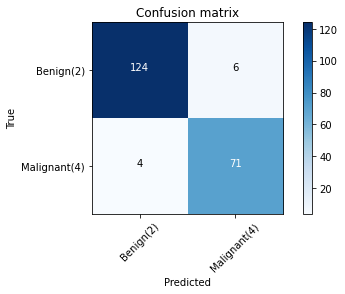

In [68]:
#Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Benign(2)','Malignant(4)'],normalize= False,  title='Confusion matrix')
#Precision is a measure of the accuracy provided that a class label has been predicted. It is defined by: precision = TP / (TP + FP) 
#Recall is true positive rate. It is defined as: Recall = TP / (TP + FN)

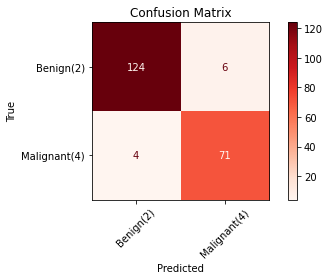

In [112]:
#Here is an alternative way to plot the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix, 
                              display_labels=['Benign(2)','Malignant(4)'])

disp = disp.plot(cnf_matrix.all(), values_format='d', cmap=plt.cm.Reds)

plt.xticks(rotation=45)
plt.title('Confusion Matrix')
plt.ylabel('True')
plt.xlabel('Predicted')
plt.tight_layout()

In [65]:
from sklearn.metrics import f1_score
f1_score(ytest, yhat, average='weighted')
#A measure of similarity for the two sets of data, with a range from 0% to 100%
#The closer to 100% the more accurate

0.9513513647988376

In [66]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, yhat)
#A measure of similarity for the two sets of data, with a range from 0% to 100%
#The closer to 100% the more accurate

0.9512195121951219